## Observations and Insights 

In [2]:
#Dependencies and Setup

from IPython.display import display, HTML
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#Paths

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [4]:
#Conclusions

f = open("output/Summary.txt", "a")


f.write("Conclusions: \n")
f.write("\n")
f.write("1. Capomulin is overall a very effective drug regimen-looking at average tumor volume across all mice across the timepoints (2nd to last graph), there is a clear, consistent, and sharp reduction in tumor volume over time.")
f.write("\n")
f.write("2. This study's subjects are about 50:50 male:female mice, which is good experimental design to make sure gender does not have an undue effect on the outcome of the data.")
f.write("\n")
f.write("3. The boxplot (3rd from the bottom) also proves the effectiveness of Capomulin, as well as Ramicane-the 2 most effective treatments that have the lowest average final tumor volume across all mice.")
f.write("\n")
f.close()

print("Conclusions: \n")
print("\n")
print("1. Capomulin is overall a very effective drug regimen-looking at average tumor volume across all mice across the timepoints (2nd to last graph), there is a clear, consistent, and sharp reduction in tumor volume over time.")
print("\n")
print("2. This study's subjects are about 50:50 male:female mice, which is good experimental design to make sure gender does not have an undue effect on the outcome of the data.")
print("\n")
print("3. The boxplot (3rd from the bottom) also proves the effectiveness of Capomulin, as well as Ramicane-the 2 most effective treatments that have the lowest average final tumor volume across all mice.")
print("\n")

Conclusions: 



1. Capomulin is overall a very effective drug regimen-looking at average tumor volume across all mice across the timepoints (2nd to last graph), there is a clear, consistent, and sharp reduction in tumor volume over time.


2. This study's subjects are about 50:50 male:female mice, which is good experimental design to make sure gender does not have an undue effect on the outcome of the data.


3. The boxplot (3rd from the bottom) also proves the effectiveness of Capomulin, as well as Ramicane-the 2 most effective treatments that have the lowest average final tumor volume across all mice.




In [5]:
#Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [6]:
# Combine the data into a single Master Dataframe 

df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


In [7]:
# Display the Master dataframe table for preview

display(df)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice.

mouse_ids = df["Mouse ID"]
mouse_unique = mouse_ids.drop_duplicates()

totalmice = len(mouse_unique)

display("Total Mice: " + str(totalmice))

'Total Mice: 249'

In [9]:
#Find Mice With Duplicate Timepoints

#Create Dataframe 2 indexed by Mouse ID
df2 = df.set_index("Mouse ID")

#Count Timepoints Per Mouse
timepoints = df2.groupby(level=0)["Timepoint"].count()

#Count Unique Timepoints Per Mouse
timeunique = df2.groupby(level=0)["Timepoint"].nunique()

#Compare 2 Timepoint Lists
mousedelete = (timepoints != timeunique)

#Find Mice to Delete
mousedelete = mousedelete[mousedelete]
mousedelete = mousedelete.index.tolist()


In [10]:
print("Delete Mouse: " + str(mousedelete))

Delete Mouse: ['g989']


In [11]:
# Create a clean DataFrame 3 by dropping the duplicate mouse by its ID.

df3 = df2.drop(mousedelete)
df6 = df3.copy()

In [12]:
# Checking the number of mice in the clean DataFrame.

cleaned_ids = df3.groupby(level=0)
display("Cleaned Mice: " + str(len(cleaned_ids)))

'Cleaned Mice: 248'

## Summary Statistics

In [13]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

df4 = df3.reset_index()
df4 = df4.set_index("Drug Regimen")
tumorseries = df4['Tumor Volume (mm3)']
tumormean = tumorseries.groupby(level=0).mean()
tumormed = tumorseries.groupby(level=0).median()
tumorvar = tumorseries.groupby(level=0).var()
tumorstd = tumorseries.groupby(level=0).std()
tumorsem = tumorseries.groupby(level=0).sem()
drugarray = tumormean.index.tolist()
sumdata = [tumormean, tumormed, tumorvar, tumorstd, tumorsem]
sumdf = pd.DataFrame(sumdata, columns = drugarray, index = ['Tumor Mean (mm3)','Tumor Median (mm3)', 'Tumor Variance', 'Tumor Std Dev', 'Tumor SEM' ])

display(sumdf)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Mean (mm3),40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Tumor Median (mm3),41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Tumor Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
Tumor Std Dev,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Tumor SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [14]:
# Using the aggregation method, produce the same summary statistics in a single column
sumagg = sumdf.agg('mean', axis='columns')

sumdf2 = pd.DataFrame(sumagg, columns = ["All Drug Regimens"], index = ['Tumor Mean (mm3)','Tumor Median (mm3)', 'Tumor Variance', 'Tumor Std Dev', 'Tumor SEM' ])

display(sumdf2)

,All Drug Regimens
Tumor Mean (mm3),50.975982
Tumor Median (mm3),49.902123
Tumor Variance,47.858440
Tumor Std Dev,6.821103
Tumor SEM,0.502785


## Bar and Pie Charts

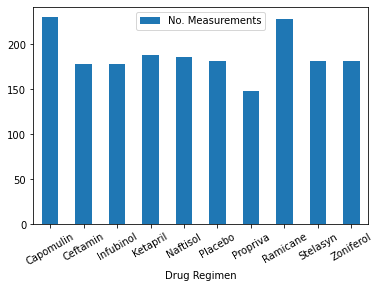

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drugpd = tumorseries.groupby(level=0).count()
barpanda = pd.DataFrame ({'Drug Regimen': drugarray, 'No. Measurements': drugpd})
ax = barpanda.plot.bar(x='Drug Regimen', y='No. Measurements', rot=30)

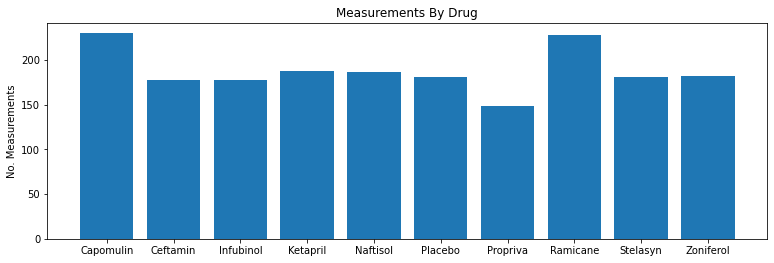

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

fig = plt.figure(figsize=(10,3))
pyplot1 = fig.add_axes([0,0,1,1])
pyplot1.bar(drugarray , drugpd)
pyplot1.set_ylabel('No. Measurements')
pyplot1.set_title('Measurements By Drug')

plt.show()

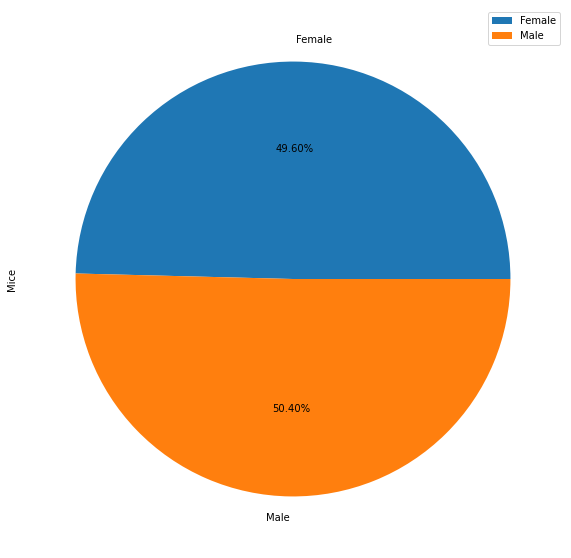

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

df5 = df4.set_index("Sex")

genderseries = df5["Mouse ID"]
genderseries = genderseries.drop_duplicates()
genderseries = genderseries.groupby(level=0).count()



dfgender = pd.DataFrame({"Mice":[genderseries[0], genderseries[1]]},
                  index=['Female', 'Male'])

plot = dfgender.plot.pie(y="Mice", autopct="%1.2f%%", figsize=(10,10))


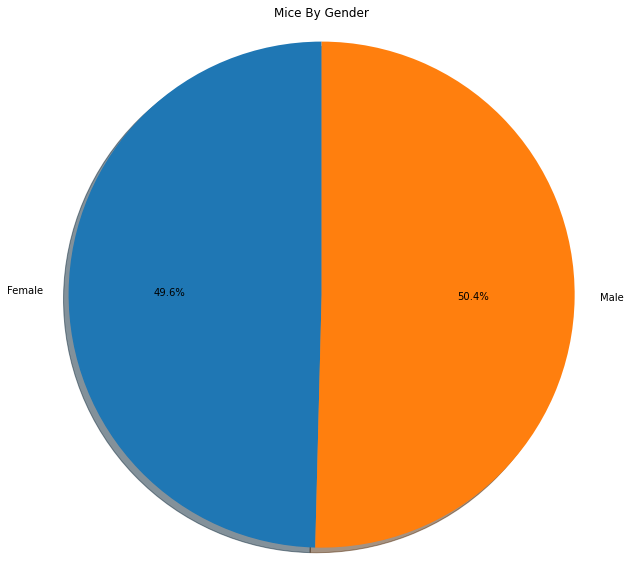

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = 'Female', 'Male'
sizes = [genderseries[0]/len(cleaned_ids), genderseries[1]/len(cleaned_ids)]

fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title("Mice By Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin, Ramicane, Infubinol, and Ceftamin 

df7 = df6.reset_index()

#Create Series of Final Timepoints Indexed By Mouse ID 
endpoints = df6.groupby(level=0)["Timepoint"].max()
endpoints = endpoints.reset_index()

#Create DataFrame With Pertinent Columns
endvol = df7[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen','Timepoint']].copy()
endvol = endvol.sort_index()
endvol = endvol.reset_index(drop=True)

#Merge
finaltumor = pd.merge(endvol, endpoints)
finaltumor = finaltumor.sort_values(["Drug Regimen", "Mouse ID"])
finaltumor = finaltumor.set_index("Drug Regimen")

display(finaltumor)

,Mouse ID,Tumor Volume (mm3),Timepoint
Drug Regimen,,,
Capomulin,b128,38.982878,45
Capomulin,b742,38.939633,45
Capomulin,f966,30.485985,20
Capomulin,g288,37.074024,45
Capomulin,g316,40.159220,45
...,...,...,...
Zoniferol,q633,70.827796,45
Zoniferol,s337,62.109651,45
Zoniferol,w140,47.717952,5


In [20]:
#For each treatment regimen: analyze tumor volume for each mouse at last timepoint, calculate IQR & find potential outliers. 
#oad Numbers Into DataFrame For Box Plots

drugarray.sort()
series1 = pd.Series(data=finaltumor["Tumor Volume (mm3)"])
boxstat = pd.DataFrame(np.zeros((6, 10)), columns=drugarray, index=['IQR', 'Q0', 'Q25', 'Q75', 'Q100', 'Outliers'])
boxdf = pd.DataFrame(np.zeros((25, 10)), columns=drugarray)


for x in range(len(drugarray)):
        regimen1 = drugarray[x] 
        series2 = series1[regimen1].tolist()
        tumorvol=np.asarray(series2)
      
        q75 = np.percentile(tumorvol, 75)
        q25 = np.percentile(tumorvol, 25)

        iqr = q75 - q25
        q0= q25 - (1.5 * iqr)
        q100 = q75 + (1.5 * iqr)
        outlierlist = []
        
        for z in series2: 
            if z >= q100 or z <= q0:
                outlierlist.append(z)
    
        if(len(series2)<25):
            series2.append(0)
            
        boxdf[regimen1]=series2
        
        boxstatdata = [iqr, q0, q25,q75,q100, outlierlist]
        boxstat[regimen1]=boxstatdata
        
display(boxstat)


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
IQR,7.78186,15.5778,11.4771,13.1522,17.4841,15.1914,13.5696,9.09854,16.6273,16.8059
Q0,20.7046,25.3554,36.8329,36.9919,25.8533,30.1558,28.7653,17.9127,27.5356,24.7795
Q25,32.3774,48.7221,54.0486,56.7201,52.0795,52.9429,49.1197,31.5605,52.4766,49.9883
Q75,40.1592,64.2998,65.5257,69.8723,69.5636,68.1343,62.6894,40.659,69.1039,66.7942
Q100,51.832,87.6665,82.7414,89.6005,95.7898,90.9214,83.0438,54.3068,94.045,92.0029
Outliers,[],[],[36.321345799999996],[],[],[],[],[],[],[]


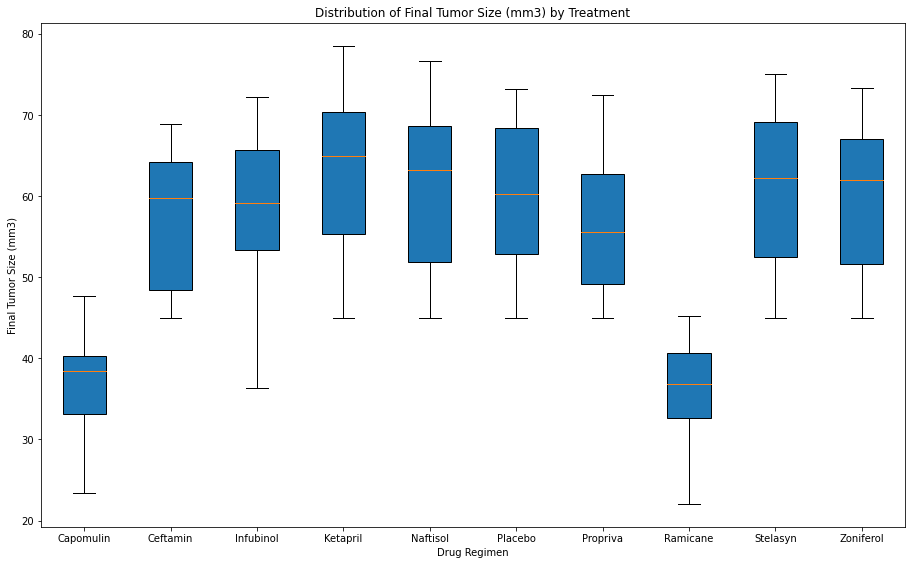

In [21]:
# Generate a box plot of the final tumor volume of each mouse across regimens

boxdf=boxdf.replace(0, np.nan)

boxfig = plt.figure(figsize=(12, 7))
ax2 = boxfig.add_axes([0,0,1,1])
ax2.set_title('Distribution of Final Tumor Size (mm3) by Treatment')
labels = drugarray
bp = ax2.boxplot(boxdf.dropna(), patch_artist=True,labels=labels)
ax2.set_xlabel('Drug Regimen')
ax2.set_ylabel('Final Tumor Size (mm3)')


plt.show()


## Line and Scatter Plots

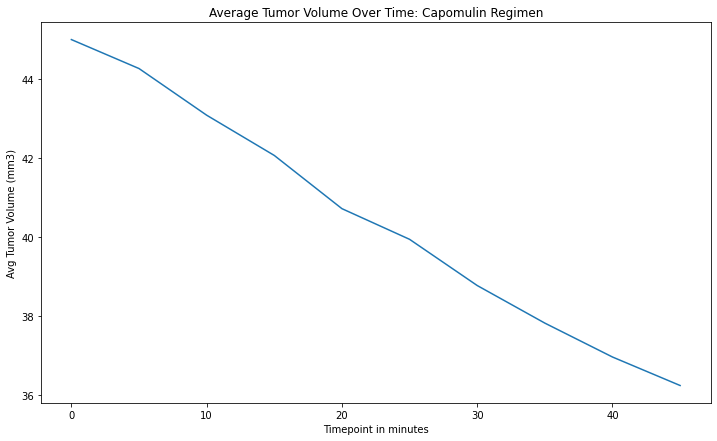

In [22]:
# Generate a line plot of average tumor volume vs. time point for a mouse treated with Capomulin


df8 = df7.copy()
df8 = df7[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen','Timepoint']].copy()


df8 = df8.sort_values(["Drug Regimen", "Mouse ID"])
df8 = df8.set_index("Drug Regimen")
df9 = df8.loc['Capomulin']

df9 = df9.set_index(["Timepoint"])

capomulinseries = df9.groupby(level=0).mean()


linep = plt.figure(figsize=(12, 7))
plt.plot(capomulinseries)
plt.ylabel('Avg Tumor Volume (mm3)')
plt.xlabel('Timepoint in minutes')
plt.title('Average Tumor Volume Over Time: Capomulin Regimen')

plt.show()

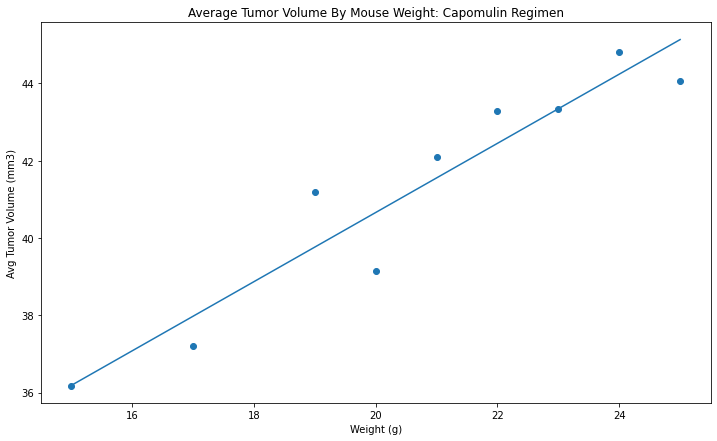

Correlation Coefficient = 0.8947726097340629


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen, perform linear regression & find correlation coefficient

df10 =  df7[['Mouse ID', 'Tumor Volume (mm3)', 'Drug Regimen','Weight (g)']].copy()
df10 = df10.set_index("Drug Regimen")
df11 = df10.loc['Capomulin']
df11 = df11.set_index("Weight (g)")
df12 = df11.groupby(level=0).mean()
df12 = df12.reset_index()


lines = plt.figure(figsize=(12, 7))
N = len(df12)
w = df12['Weight (g)']
v = df12['Tumor Volume (mm3)']
plt.scatter(w, v)
m, c = np.polyfit(w, v, 1)
plt.plot(w, (m*w + c))


plt.ylabel('Avg Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('Average Tumor Volume By Mouse Weight: Capomulin Regimen')

plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(w,v)

print("Correlation Coefficient = " + str(slope))

## Correlation and Regression